In [66]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size':14})
from matplotlib.ticker import FormatStrFormatter

In [123]:
folder = 'three_particles_shift/' 
folder_up = 'three_particles_up/' 
pat = 'sphere_coords_%05d.txt'

In [124]:
dt=0.0015

In [106]:
num_particles = 3

lst = []
m = 1e6
for i in range(num_particles):
    arr = np.loadtxt(folder+pat%i)
    print(arr.shape)
    m = min(arr.shape[0], m)
    lst.append(arr)

m = int(0.95*m)    
x = np.zeros((num_particles, m, arr.shape[1]))   
for i in range(num_particles):
    x[i] = lst[i][:m]

arr = x  

(65741, 11)
(65683, 11)
(65596, 11)


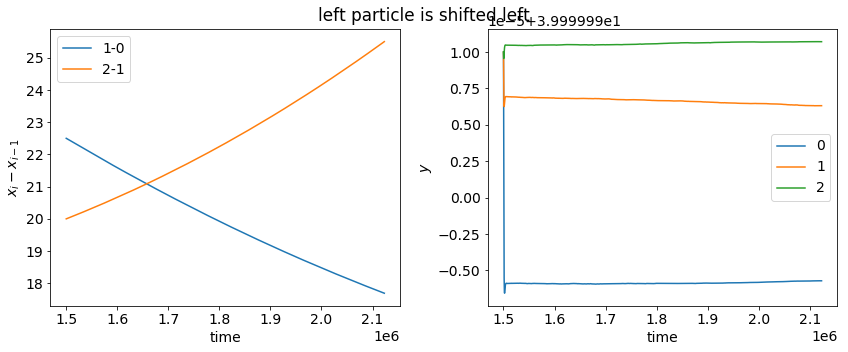

In [107]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('left particle is shifted left')
for i in range(1,3):
    ax[0].plot(arr[i, :, 0], arr[i, :, 1]-arr[i-1, :, 1], label='%d-%d'%(i, i-1))

ax[0].legend()
ax[0].ticklabel_format(axis='x', style='sci', scilimits=(0,0))

for i in range(3):
    ax[1].plot(arr[i, :, 0], arr[i, :, 2], label='%d'%(i))
ax[1].legend()
ax[1].ticklabel_format(axis='both',style='sci', scilimits=(0,0))

ax[0].set_xlabel('time')
ax[0].set_ylabel('$x_i-x_{i-1}$')

ax[1].set_xlabel('time')
ax[1].set_ylabel('$y$')

fig.tight_layout()
fig.savefig('coordinates left is shifted re=0.25 3 particles.png', dpi=300)
fig.savefig('coordinates left is shifted re=0.25 3 particles.pdf', dpi=300)

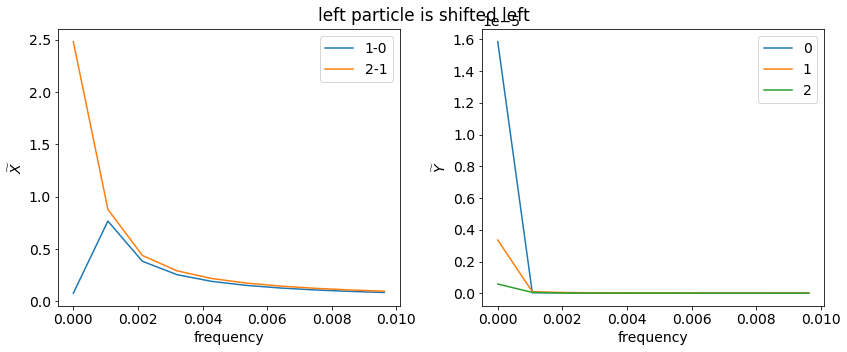

In [111]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('left particle is shifted left')
for i in range(1,3):
    out = np.fft.fft(arr[i, :, 1]-arr[i-1, :, 1]-20)
    out = np.abs(out)/arr.shape[1]
    freq = np.fft.fftfreq(arr.shape[1], d=dt*10)
    ax[0].plot(freq[:10], out[:10], label='%d-%d'%(i, i-1))

ax[0].legend()
#ax[0].ticklabel_format(axis='x', style='sci', scilimits=(0,0))

for i in range(3):
    out = np.fft.fft(arr[i, :, 2]-40)
    out = np.abs(out)/arr.shape[1]
    freq = np.fft.fftfreq(arr.shape[1], d=dt*10)
    ax[1].plot(freq[:10], out[:10], label=str(i))
ax[1].legend()
ax[1].ticklabel_format(axis='y',style='sci', scilimits=(0,0))

ax[0].set_xlabel('frequency')
ax[0].set_ylabel(r'$\widetilde{X}$')

ax[1].set_xlabel('frequency')
ax[1].set_ylabel(r'$\widetilde{Y}$')

fig.tight_layout()
fig.savefig('spectrum left is shifted re=0.25 3 particles.png', dpi=300)
fig.savefig('spectrum left is shifted re=0.25 3 particles.pdf', dpi=300)

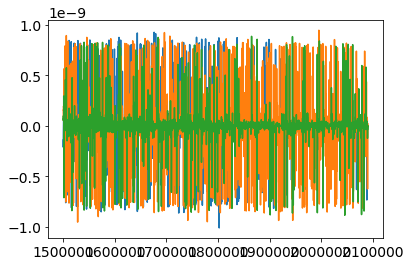

In [43]:
for i in range(num_particles):
    plt.plot(arr[i,:,0], arr[i,:,-1])

# up

In [125]:
num_particles = 3

lst = []
m = 1e6
for i in range(num_particles):
    arr = np.loadtxt(folder_up+pat%i)
    print(arr.shape)
    m = min(arr.shape[0], m)
    lst.append(arr)

m = int(0.95*m)     
x = np.zeros((num_particles, m, arr.shape[1]))   
for i in range(num_particles):
    x[i] = lst[i][:m]

arr = x  

(66043, 11)
(65906, 11)
(65672, 11)


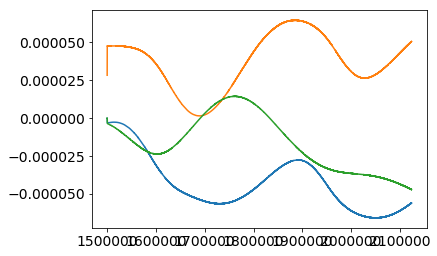

In [126]:
for i in range(num_particles):
    plt.plot(arr[i,:,0], arr[i,:,-1])

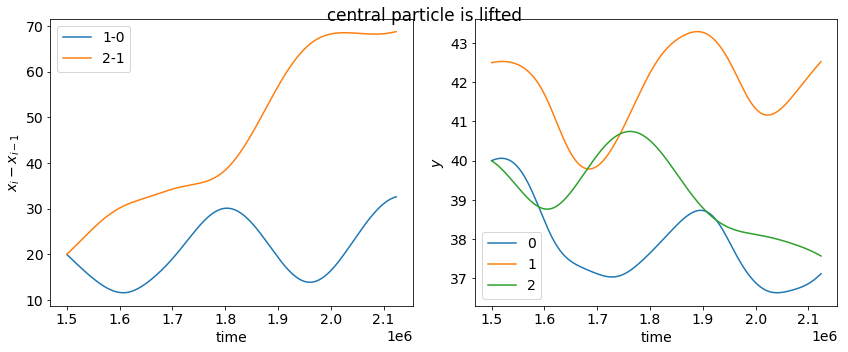

In [127]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('central particle is lifted')
for i in range(1,3):
    ax[0].plot(arr[i, :, 0], arr[i, :, 1]-arr[i-1, :, 1], label='%d-%d'%(i, i-1))

ax[0].legend()
ax[0].ticklabel_format(axis='x', style='sci', scilimits=(0,0))

for i in range(3):
    ax[1].plot(arr[i, :, 0], arr[i, :, 2], label='%d'%(i))
ax[1].legend()
ax[1].ticklabel_format(axis='x',style='sci', scilimits=(0,0))

ax[0].set_xlabel('time')
ax[0].set_ylabel('$x_i-x_{i-1}$')

ax[1].set_xlabel('time')
ax[1].set_ylabel('$y$')


fig.tight_layout()
# fig.savefig('coordinates central is lifted re=0.25 3 particles.png', dpi=300)
# fig.savefig('coordinates central is lifted re=0.25 3 particles.pdf', dpi=300)

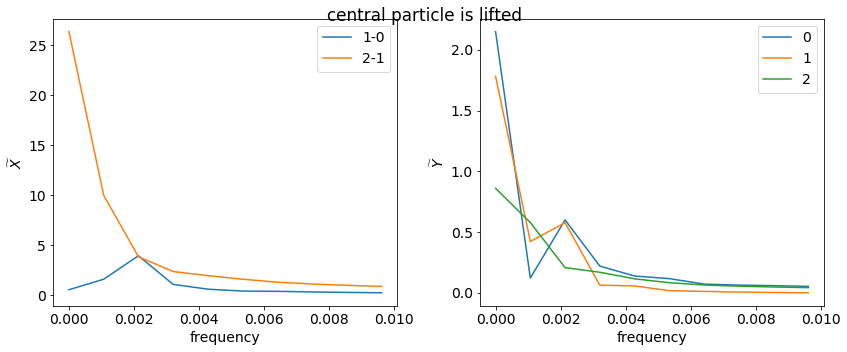

In [128]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('central particle is lifted')
for i in range(1,3):
    out = np.fft.fft(arr[i, :, 1]-arr[i-1, :, 1]-20)
    out = np.abs(out)/arr.shape[1]
    freq = np.fft.fftfreq(arr.shape[1], d=dt*10)
    ax[0].plot(freq[:10],out[:10], label='%d-%d'%(i, i-1))

ax[0].legend()
#ax[0].ticklabel_format(axis='x', style='sci', scilimits=(0,0))

for i in range(3):
    out = np.fft.fft(arr[i, :, 2]-40)
    out = np.abs(out)/arr.shape[1]
    freq = np.fft.fftfreq(arr.shape[1], d=dt*10)
    ax[1].plot(freq[:10],out[:10], label=str(i))
ax[1].legend()
ax[1].ticklabel_format(axis='y',style='sci', scilimits=(0,0))

ax[0].set_xlabel('frequency')
ax[0].set_ylabel(r'$\widetilde{X}$')

ax[1].set_xlabel('frequency')
ax[1].set_ylabel(r'$\widetilde{Y}$')

fig.tight_layout()
fig.savefig('spectrum central is lifted re=0.25 3 particles.png', dpi=300)
fig.savefig('spectrum central is lifted re=0.25 3 particles.pdf', dpi=300)

In [144]:
txy1 = arr[:, :, :3].copy()

txy = txy1.copy()
for i in range(1, num_particles):
    txy[i, :, 1] = txy1[i, :, 1] - txy1[i-1, :, 1]
    
txy[0,:,1] = 0 #xi(0,t) = 0    
txy[:,:,2] -= 40

txy[:,:,0] *= dt

In [171]:
out = np.fft.fft2(txy[:, :, 2])
out = np.log(np.abs(out)**2)

out2 = np.hstack((out[:,:8], out[:,-8:]))
#out2[0] = 0
out2[:,0] = 0

out2 = np.roll(out2, shift=1, axis=0)
out2 = np.roll(out2, shift=8, axis=1)

#out2 = out2[::-1]

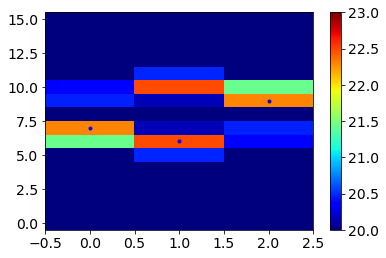

In [172]:
#plt.imshow(np.transpose(out2), aspect='auto', cmap='jet')
plt.imshow(out2.T, origin='lower', aspect='auto', cmap='jet')


#plt.pcolormesh( out2, cmap='jet')

for i in range(num_particles):
    #print(out[i,1:].shape,np.argmax(out[i,1:]))
    plt.plot(i, 1+np.argmax(out2[i,1:]), '.b')
    #print(i, out[i,1:].shape,np.argmax(out[i,1:]))
plt.clim(20,23)
plt.colorbar()
fig = plt.gcf()
fig.savefig('fft2 y three particles re=0.25.png', dpi=300)
fig.savefig('fft2 y three particles re=0.25.pdf', dpi=300)


In [173]:
out = np.fft.fft2(txy[:, :, 1])
out = np.log(np.abs(out)**2)

out2 = np.hstack((out[:,:8], out[:,-8:]))
#out2[0] = 0
out2[:,0] = 0

out2 = np.roll(out2, shift=1, axis=0)
out2 = np.roll(out2, shift=8, axis=1)

#out2 = out2[::-1]

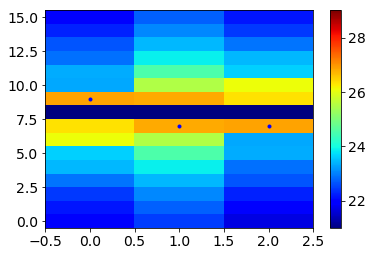

In [174]:
#plt.imshow(np.transpose(out2), aspect='auto', cmap='jet')
plt.imshow(out2.T, origin='lower', aspect='auto', cmap='jet')


#plt.pcolormesh( out2, cmap='jet')

for i in range(num_particles):
    #print(out[i,1:].shape,np.argmax(out[i,1:]))
    plt.plot(i, 1+np.argmax(out2[i,1:]), '.b')
    #print(i, out[i,1:].shape,np.argmax(out[i,1:]))
plt.clim(21,29)
plt.colorbar()
fig = plt.gcf()
fig.savefig('fft2 x three particles re=0.25.png', dpi=300)
fig.savefig('fft2 x three particles re=0.25.pdf', dpi=300)
